In [39]:
import pandas as pd
df = pd.read_csv('ST_train.csv')
#df = pd.read_csv('ST_test.csv')

In [40]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**Destination imputation**

no strong correlations

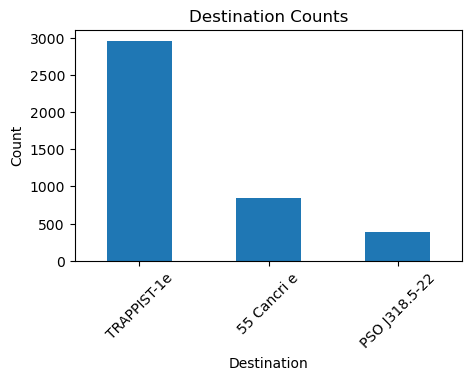

In [41]:
import matplotlib.pyplot as plt
destination_counts = df['Destination'].value_counts()

# Plotting
plt.figure(figsize=(5, 3))
destination_counts.plot(kind='bar')
plt.title('Destination Counts')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
destination_mode = df['Destination'].mode()[0]
df['Destination'].fillna(destination_mode, inplace=True)

In [43]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**Age imputation**

no good correlation, review distribution, if skewed, use median

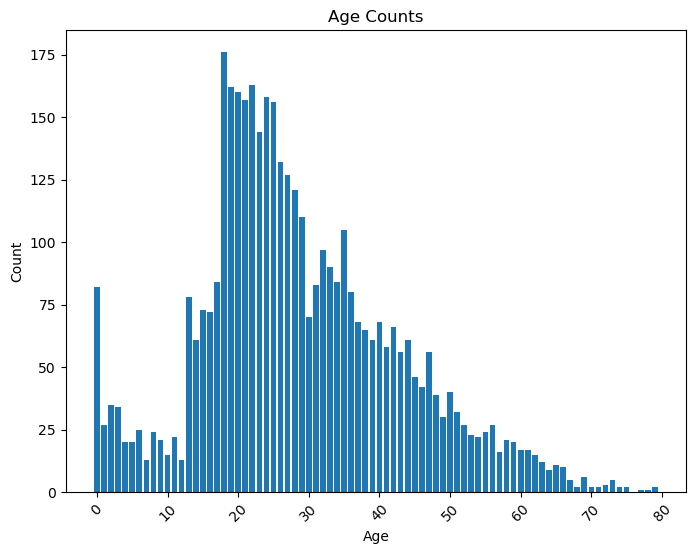

In [44]:
age_counts = df['Age'].value_counts()

age_counts = df.groupby('Age').size().reset_index(name='counts')

# Sort the DataFrame by 'Age' in ascending order
age_counts_sorted = age_counts.sort_values(by='Age')

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(age_counts_sorted['Age'], age_counts_sorted['counts'])
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
Age_median = df['Age'].median()
df['Age'].fillna(Age_median, inplace=True)
print(Age_median)

26.0


In [46]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination       0
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**VIP imputation**

no good correlation, use Mode

In [47]:
VIP_mode = df['VIP'].mode()[0]
df['VIP'].fillna(VIP_mode, inplace=True)

In [48]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**RoomService,FoodCourt,ShoppingMall,Spa,VRDeck imputation**

use medians

In [49]:
columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
non_zero_counts = df[columns_to_check].applymap(lambda x: x != 0).sum()
print(non_zero_counts)

RoomService     1551
FoodCourt       1587
ShoppingMall    1533
Spa             1666
VRDeck          1520
dtype: int64


In [50]:
columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Create a new column with the count of non-zero values in each row
df['NonZeroCounts'] = df[columns_to_check].apply(lambda row: (row != 0).sum(), axis=1)
print(df['NonZeroCounts'].value_counts())

NonZeroCounts
0    1611
3     983
4     708
2     565
1     276
5     134
Name: count, dtype: int64


In [51]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId        0
HomePlanet        87
CryoSleep         93
Cabin            100
Destination        0
Age                0
VIP                0
RoomService       82
FoodCourt        106
ShoppingMall      98
Spa              101
VRDeck            80
Name              94
NonZeroCounts      0
dtype: int64


In [52]:
df = df.drop(['NonZeroCounts'], axis=1)

In [53]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [54]:
columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Replace NaN with zero for comparison purposes
df_filled = df[columns_to_check].fillna(0)
# Check if all specified columns are zero
all_zero = (df_filled == 0).all(axis=1)
# Check if there is at least one NaN in the specified columns
at_least_one_nan = df[columns_to_check].isna().any(axis=1)
# Combine conditions: All zeros and at least one NaN
condition = all_zero & at_least_one_nan
# Filter rows based on the condition
rows_with_condition = df[condition]

columns_to_impute = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Get the indices of the rows to impute
indices_to_impute = rows_with_condition.index
# Impute NaN values with zero in the specified columns for these rows in the original DataFrame
df.loc[indices_to_impute, columns_to_impute] = df.loc[indices_to_impute, columns_to_impute].fillna(0)

In [55]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      53
FoodCourt        65
ShoppingMall     60
Spa              50
VRDeck           41
Name             94
dtype: int64


In [56]:
# List of columns to impute
columns_to_impute = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Calculate the median for each column and impute NaN values with the median
for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
    
df.to_csv('ST_train_impute_base.csv', index=False)

In [57]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64
